In [ ]:
# Download the KITTI dataset
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/data_semantics.zip


--2025-02-23 18:27:00--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_semantics.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.169.181, 3.5.134.195, 52.219.72.139, ...
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.169.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 327699796 (313M) [application/zip]
Saving to: ‘data_semantics.zip’

data_semantics.zip  100%[===================>] 312.52M  12.9MB/s    in 28s     

2025-02-23 18:27:29 (11.2 MB/s) - ‘data_semantics.zip’ saved [327699796/327699796]



In [ ]:
!unzip data_semantics.zip

Archive:  data_semantics.zip
   creating: testing/
   creating: testing/image_2/
  inflating: testing/image_2/000000_10.png  
  inflating: testing/image_2/000001_10.png  
  inflating: testing/image_2/000002_10.png  
  inflating: testing/image_2/000003_10.png  
  inflating: testing/image_2/000004_10.png  
  inflating: testing/image_2/000005_10.png  
  inflating: testing/image_2/000006_10.png  
  inflating: testing/image_2/000007_10.png  
  inflating: testing/image_2/000008_10.png  
  inflating: testing/image_2/000009_10.png  
  inflating: testing/image_2/000010_10.png  
  inflating: testing/image_2/000011_10.png  
  inflating: testing/image_2/000012_10.png  
  inflating: testing/image_2/000013_10.png  
  inflating: testing/image_2/000014_10.png  
  inflating: testing/image_2/000015_10.png  
  inflating: testing/image_2/000016_10.png  
  inflating: testing/image_2/000017_10.png  
  inflating: testing/image_2/000018_10.png  
  inflating: testing/image_2/000019_10.png  
  inflating: testin

###### DeepLabV3+

training images are in
training/image_2 and labels are in training/semantic_rgb


In [ ]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# Load the pretrained DeepLabV3+ model
model = torchvision.models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()  # Set the model to evaluation mode

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
# Load an image from a file (replace with your own image path)
image_path = '/content/training/image_2/000000_10.png'  # Change to your image's path
input_image = Image.open(image_path)

# Define the necessary transformations (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
])

# Apply the transformations
input_tensor = transform(input_image).unsqueeze(0)  # Add a batch dimension (1, C, H, W)


In [ ]:
# Run the model on the input image
with torch.no_grad():  # Disable gradients for inference
    output = model(input_tensor)

# Extract the segmentation map from the output
segmentation_map = output['out'][0]  # Get the first image's output
segmentation_map = segmentation_map.argmax(0)  # Get the class with the highest score for each pixel

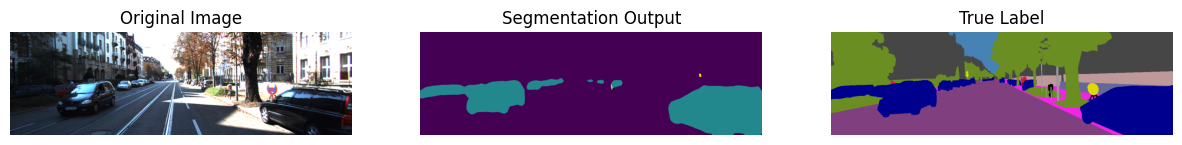

In [ ]:
# Convert the segmentation map to a numpy array
segmentation_map = segmentation_map.cpu().numpy()

# Plot the original image and the segmentation result
fig, axes = plt.subplots(1, 3, figsize=(15, 7))

# Original image
axes[0].imshow(input_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Segmentation result
axes[1].imshow(segmentation_map)
axes[1].set_title("Segmentation Output")
axes[1].axis("off")

# Show true label
label_path = '/content/training/semantic_rgb/000000_10.png'
label = Image.open(label_path)
axes[2].imshow(label)
axes[2].axis("off")
axes[2].set_title("True Label")

plt.show()

Change output classes

In [ ]:
model = torchvision.models.segmentation.deeplabv3_resnet101(pretrained=True)
num_classes = 28
model.classifier[4] = torch.nn.Conv2d(256, num_classes, kernel_size=1)
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
image_path = "/content/training/image_2/000000_10.png"
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0)

In [ ]:
with torch.no_grad():
    output = model(input_tensor)['out']
    predicted_mask = torch.argmax(output, dim=1).squeeze(0).cpu().numpy()

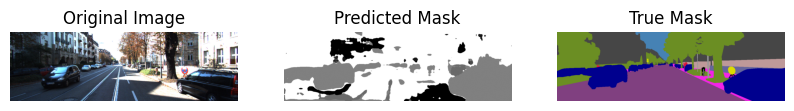

In [ ]:
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Predicted Mask
plt.subplot(1, 3, 2)
plt.imshow(predicted_mask, cmap="gray")  # Lane pixels should appear different from background
plt.title("Predicted Mask")
plt.axis("off")

# True Mask
plt.subplot(1, 3, 3)
true_mask = Image.open('/content/training/semantic_rgb/000000_10.png')
plt.imshow(true_mask)
plt.title("True Mask")
plt.axis("off")

plt.show()

###### Train

In [ ]:
import torch
import torchvision
from torchvision.models.segmentation import deeplabv3_resnet101

# Load DeepLabV3+ with a ResNet-101 backbone
model = deeplabv3_resnet101(pretrained=True)

# Modify the last layer for 2 classes: {background, lane}
model.classifier[4] = torch.nn.Conv2d(256, 2, kernel_size=1)

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100%|██████████| 233M/233M [00:03<00:00, 80.4MB/s]


In [ ]:
import os
import cv2
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

# Define a custom dataset class
class KITTILaneDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = sorted(os.listdir(image_dir))
        self.masks = sorted(os.listdir(mask_dir))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.images[idx])
        mask_path = os.path.join(self.mask_dir, self.masks[idx])

        image = cv2.imread(img_path)  # Load image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load mask (grayscale)

        # Resize both the image and mask to a fixed size (e.g., 520x520)
        image = cv2.resize(image, (520, 520))  # Resize image to 520x520
        mask = cv2.resize(mask, (520, 520), interpolation=cv2.INTER_NEAREST)  # Resize mask (use nearest for binary mask)

        # Normalize mask: 255 (lane) → 1, 0 (background) → 0
        mask = (mask > 128).astype(np.uint8)

        if self.transform:
            image = self.transform(image)
            mask = torch.tensor(mask, dtype=torch.long)  # Convert to tensor

        return image, mask

# Define transformations
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((520, 520)),  # Resize images
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
])

# Load dataset
dataset = KITTILaneDataset("/content/training/image_2", "/content/training/semantic_rgb", transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

In [ ]:
import torch.nn as nn
import torch.optim as optim

# Cross-Entropy Loss for segmentation
criterion = nn.CrossEntropyLoss()

# Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
from tqdm import tqdm

num_epochs = 10  # Set epochs
model.train()

for epoch in range(num_epochs):
    running_loss = 0.0
    loop = tqdm(dataloader, leave=True)

    for images, masks in loop:
        images, masks = images.to(device), masks.to(device)

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)["out"]  # Forward pass

        loss = criterion(outputs, masks)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()
        loop.set_description(f"Epoch [{epoch+1}/{num_epochs}]")
        loop.set_postfix(loss=running_loss / len(dataloader))

print("Training Complete!")

Epoch [4/10]:   4%|▍         | 2/50 [00:06<02:41,  3.37s/it, loss=0.00562]


KeyboardInterrupt: 

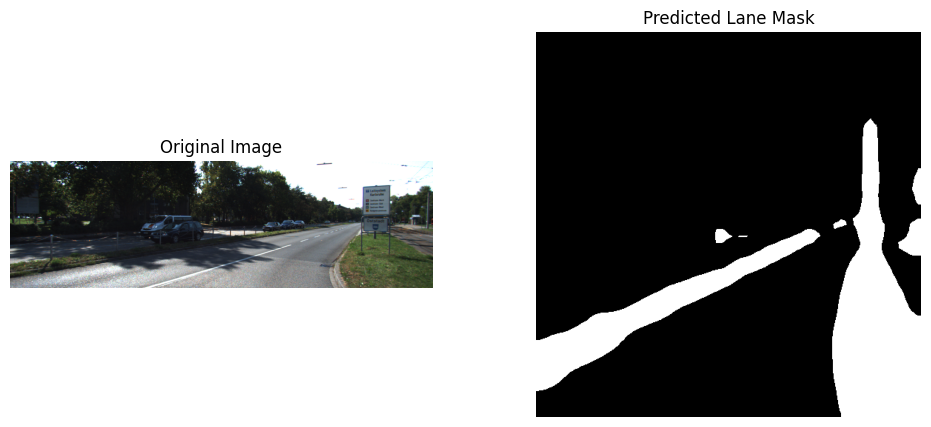

In [ ]:
import matplotlib.pyplot as plt

# Switch to evaluation mode
model.eval()

def predict(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    input_image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_image)['out']
        predicted_mask = torch.argmax(output, dim=1).squeeze(0).cpu().numpy()

    # Visualize
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(predicted_mask, cmap="gray")
    plt.title("Predicted Lane Mask")
    plt.axis("off")

    plt.show()

# Run prediction on a sample image
predict("/content/testing/image_2/000001_10.png")

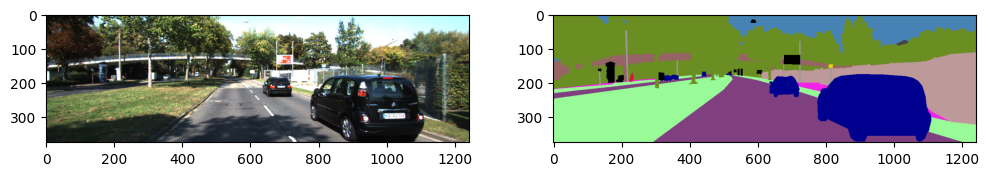

In [ ]:
import PIL
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
im_path = "/content/training/image_2/000020_10.png"
image = PIL.Image.open(im_path)
plt.imshow(image)

plt.subplot(1, 2, 2)
mask_path = "/content/training/semantic_rgb/000020_10.png"
mask = PIL.Image.open(mask_path)
plt.imshow(mask)

plt.show()

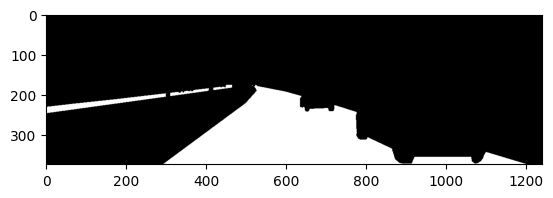

In [ ]:
pixels = np.array(mask)
lane_color = np.array([128,64,128])
lane_mask = np.all(pixels==lane_color, axis=-1)

pixels[lane_mask] = [255,255,255]
pixels[~lane_mask]=[0,0,0]

preprocessed_mask = PIL.Image.fromarray(pixels)
plt.imshow(preprocessed_mask)
plt.show()

###### To find the number of classes

In [ ]:
import cv2
import numpy as np
mask_path = "/content/training/semantic_rgb/000020_10.png"
mask = cv2.imread(mask_path)
mask_reshaped = mask.reshape(-1, 3)
unique_classes = np.unique(mask_reshaped, axis=0)

In [ ]:
print(unique_classes)

[[  0   0   0]
 [  0 220 220]
 [ 35 142 107]
 [ 60  20 220]
 [ 70  70  70]
 [100 100 150]
 [128  64 128]
 [142   0   0]
 [152 251 152]
 [153 153 153]
 [153 153 190]
 [180 130  70]
 [232  35 244]]


In [ ]:
print(len(unique_classes))

13


###### To preprocess training masks

In [ ]:
# Define a dictionary mapping RGB colors to class labels
# The key is the (R, G, B) tuple, and the value is the corresponding class label
color_map = {
    (128, 64, 128): 1,    # Road
    (35,142,107): 2,    # Sidewalk
    (70, 70, 70): 3,      # Building
    (60,20,220): 4,   # Wall
    (153, 153, 153): 5,   # Fence
    (153, 153, 190): 6,   # Vegetation
    (0,220,220): 7,     # Terrain
    (142,0,0): 8,       # Sky
    (100, 100, 150): 9,       # Person
    (152, 251, 152): 10,      # Car
    (180, 130, 70): 11,    # Bicycle
    (232, 35, 244): 12,    # Motorcycle
    (0,0,0): 0,   # Background (can be 0)
}


In [ ]:
import numpy as np
import cv2

# Load a color-encoded mask image (example path)
mask_image = cv2.imread('/content/training/semantic_rgb/000020_10.png')  # Shape should be (height, width, 3)

# Create an empty integer mask with the same height and width as the input mask
height, width, _ = mask_image.shape
integer_mask = np.zeros((height, width), dtype=np.uint8)

# Iterate over each pixel in the mask and convert the RGB to class label
for i in range(height):
    for j in range(width):
        # Get the RGB value of the pixel
        rgb_value = tuple(mask_image[i, j])

        # If the RGB value exists in the color_map, assign the corresponding class label
        if rgb_value in color_map:
            integer_mask[i, j] = color_map[rgb_value]
        else:
            integer_mask[i, j] = 0  # If the color is not in the map, we assign it as background

# Now `integer_mask` contains class labels (0 to 12 for KITTI)
print(integer_mask)


[[ 2  2  2 ... 11 11 11]
 [ 2  2  2 ... 11 11 11]
 [ 2  2  2 ... 11 11 11]
 ...
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]]


In [ ]:
cv2.imwrite('converted_mask.png', integer_mask)

True

In [ ]:
scaled_mask = (integer_mask * (255 // 12)).astype(np.uint8)
cv2.imwrite('converted_scaled_mask.png', scaled_mask)

True

In [ ]:
import os

# Path to the folder with RGB masks
mask_folder = '/content/training/semantic_rgb'
output_mask_folder = '/content/preprocessed_masks'
os.makedirs(output_mask_folder)
n = 0
total = len(os.listdir(mask_folder))
# Loop through all mask images
for mask_filename in os.listdir(mask_folder):
    if mask_filename.endswith(".png"):
        mask_path = os.path.join(mask_folder, mask_filename)
        mask_image = cv2.imread(mask_path)

        # Create empty integer mask
        height, width, _ = mask_image.shape
        integer_mask = np.zeros((height, width), dtype=np.uint8)

        # Convert RGB to class labels
        for i in range(height):
            for j in range(width):
                rgb_value = tuple(mask_image[i, j])
                if rgb_value in color_map:
                    integer_mask[i, j] = color_map[rgb_value]
                else:
                    integer_mask[i, j] = 0  # Background

        # Save the integer mask
        output_mask_path = os.path.join(output_mask_folder, mask_filename)
        cv2.imwrite(output_mask_path, integer_mask)
        n+=1
        print(str(n) +'/'+ str(total))


1/200
2/200
3/200
4/200
5/200
6/200
7/200
8/200
9/200
10/200
11/200
12/200
13/200
14/200
15/200
16/200
17/200
18/200
19/200
20/200
21/200
22/200
23/200
24/200
25/200
26/200
27/200
28/200
29/200
30/200
31/200
32/200
33/200
34/200
35/200
36/200
37/200
38/200
39/200
40/200
41/200
42/200
43/200
44/200
45/200
46/200
47/200
48/200
49/200
50/200
51/200
52/200
53/200
54/200
55/200
56/200
57/200
58/200
59/200
60/200
61/200
62/200
63/200
64/200
65/200
66/200
67/200
68/200
69/200
70/200
71/200
72/200
73/200
74/200
75/200
76/200
77/200
78/200
79/200
80/200
81/200
82/200
83/200
84/200
85/200
86/200
87/200
88/200
89/200
90/200
91/200
92/200
93/200
94/200
95/200
96/200
97/200
98/200
99/200
100/200
101/200
102/200
103/200
104/200
105/200
106/200
107/200
108/200
109/200
110/200
111/200
112/200
113/200
114/200
115/200
116/200
117/200
118/200
119/200
120/200
121/200
122/200
123/200
124/200
125/200
126/200
127/200
128/200
129/200
130/200
131/200
132/200
133/200
134/200
135/200
136/200
137/200
138/200
139/

###### Train the model

In [ ]:
import os
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

class KITTIDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None, image_size=(256, 256)):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_size = image_size
        self.image_names = sorted(os.listdir(image_dir))
        self.mask_names = sorted(os.listdir(mask_dir))

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.image_names[idx])
        mask_path = os.path.join(self.mask_dir, self.mask_names[idx])

        # Open the image and mask using PIL
        image = Image.open(image_path)
        mask = Image.open(mask_path)

        image = image.resize(self.image_size, Image.BILINEAR)
        mask = mask.resize(self.image_size, Image.NEAREST)

        if self.transform:
            image = self.transform(image)
            mask = torch.tensor(np.array(mask), dtype=torch.long)

        return image, mask

In [ ]:
from torch.utils.data import DataLoader

# Transformations (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize all images to 256x256 (adjust as needed)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalization
])

# Create dataset
train_dataset = KITTIDataset(image_dir='/content/training/image_2', mask_dir='/content/preprocessed_masks', transform=transform)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

In [ ]:
import torch
import torchvision.models.segmentation as segmentation

# Load pre-trained DeepLabV3+ with a ResNet-101 backbone
model = segmentation.deeplabv3_resnet101(pretrained=True)

# Modify the classifier to output 13 classes (for KITTI dataset)
model.classifier[4] = torch.nn.Conv2d(256, 13, kernel_size=(1, 1), stride=(1, 1))

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
import torch.optim as optim
import torch.nn as nn

# Loss function: CrossEntropyLoss (for multi-class segmentation)
criterion = nn.CrossEntropyLoss()

# Optimizer: Adam
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
num_epochs = 10  # Adjust number of epochs
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, masks in train_loader:
        images = images.to(device)
        masks = masks.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)['out']

        # Compute loss
        loss = criterion(outputs, masks)

        # Backward pass
        loss.backward()

        # Optimize the weights
        optimizer.step()

        running_loss += loss.item()

    # Print loss after each epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

    # Optionally, you can save the model after every epoch or at specific intervals
torch.save(model.state_dict(), f"deeplabv3_epoch{epoch+1}.pth")


KeyboardInterrupt: 

In [ ]:
import time
from tqdm import tqdm  # Progress bar

num_epochs = 10  # Adjust number of epochs
print_freq = 10  # Print loss every 10 batches

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    start_time = time.time()

    # tqdm progress bar for better visibility
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1}/{num_epochs}")

    for batch_idx, (images, masks) in progress_bar:
        images, masks = images.to(device), masks.to(device)

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)['out']  # Forward pass
        loss = criterion(outputs, masks)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Optimize the weights

        running_loss += loss.item()

        # Print progress every `print_freq` batches
        if (batch_idx + 1) % print_freq == 0 or batch_idx == len(train_loader) - 1:
            avg_loss = running_loss / (batch_idx + 1)
            progress_bar.set_postfix(loss=f"{avg_loss:.4f}")

    # Calculate and print epoch summary
    epoch_loss = running_loss / len(train_loader)
    epoch_time = time.time() - start_time
    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {epoch_loss:.4f} - Time: {epoch_time:.2f}s")

    # Save model at the end
torch.save(model.state_dict(), f"deeplabv3_epoch{epoch+1}.pth")


Epoch 1/10: 100%|██████████| 25/25 [23:00<00:00, 55.23s/it, loss=1.4202]


Epoch [1/10] - Loss: 1.4202 - Time: 1380.78s


Epoch 2/10: 100%|██████████| 25/25 [23:00<00:00, 55.21s/it, loss=1.0755]


Epoch [2/10] - Loss: 1.0755 - Time: 1380.18s


Epoch 3/10: 100%|██████████| 25/25 [22:59<00:00, 55.18s/it, loss=0.9093]


Epoch [3/10] - Loss: 0.9093 - Time: 1379.58s


Epoch 4/10: 100%|██████████| 25/25 [22:59<00:00, 55.16s/it, loss=0.7931]


Epoch [4/10] - Loss: 0.7931 - Time: 1379.12s


Epoch 5/10: 100%|██████████| 25/25 [22:57<00:00, 55.10s/it, loss=0.6999]


Epoch [5/10] - Loss: 0.6999 - Time: 1377.43s


Epoch 6/10: 100%|██████████| 25/25 [22:56<00:00, 55.04s/it, loss=0.6291]


Epoch [6/10] - Loss: 0.6291 - Time: 1376.07s


Epoch 7/10: 100%|██████████| 25/25 [22:59<00:00, 55.19s/it, loss=0.5806]


Epoch [7/10] - Loss: 0.5806 - Time: 1379.78s


Epoch 8/10: 100%|██████████| 25/25 [22:55<00:00, 55.03s/it, loss=0.5363]


Epoch [8/10] - Loss: 0.5363 - Time: 1375.75s


Epoch 9/10: 100%|██████████| 25/25 [22:58<00:00, 55.13s/it, loss=0.4885]


Epoch [9/10] - Loss: 0.4885 - Time: 1378.37s


Epoch 10/10: 100%|██████████| 25/25 [23:03<00:00, 55.34s/it, loss=0.4551]


Epoch [10/10] - Loss: 0.4551 - Time: 1383.61s


###### Inference

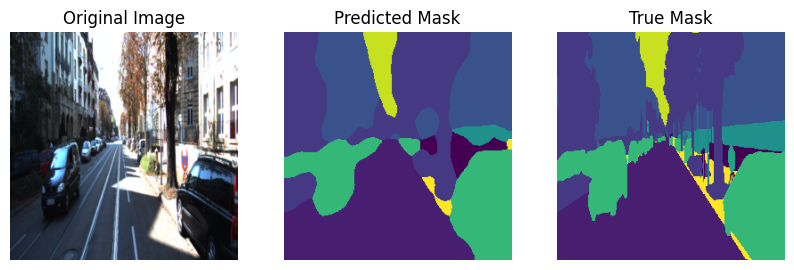

In [ ]:
import matplotlib.pyplot as plt

# Predict and visualize
model.eval()
image, mask = train_dataset[0]  # Take an image from the dataset

# Get model prediction
with torch.no_grad():
    output = model(image.unsqueeze(0).to(device))['out'][0]
    predicted_mask = torch.argmax(output, dim=0).cpu().numpy()

plt.figure(figsize=(10, 5))

mean = np.array([0.485, 0.456, 0.406])  # ImageNet mean
std = np.array([0.229, 0.224, 0.225])   # ImageNet std

def denormalize(tensor):
    """ Convert normalized tensor back to original image format """
    tensor = tensor.numpy().transpose(1, 2, 0)  # Convert [C, H, W] to [H, W, C]
    tensor = (tensor * std) + mean  # Undo normalization
    tensor = np.clip(tensor, 0, 1)  # Clip values to be between [0,1]
    return tensor


# Original Image
plt.subplot(1, 3, 1)
plt.imshow(denormalize(image.cpu()))
plt.title("Original Image")
plt.axis("off")

# Predicted Mask
plt.subplot(1, 3, 2)
plt.imshow((predicted_mask * (255 // 12)).astype(np.uint8))
plt.title("Predicted Mask")
plt.axis("off")

# True Mask
plt.subplot(1, 3, 3)
plt.imshow(mask)
plt.title("True Mask")
plt.axis("off")

plt.show()


###### Save the model to my Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Gives access to your Google Drive
torch.save(model.state_dict(), "/content/drive/My Drive/deeplabv3_epoch10.pth")

Mounted at /content/drive


In [ ]:
!cp -r "/content/preprocessed_masks" "/content/drive/MyDrive/MECH 501 Lane Segmentation"

###### Define function to evaluate IoU metric

In [ ]:
def compute_iou(pred_mask, true_mask, class_id):
    """
    Computes the Intersection over Union (IoU) for a specific class in a single image.

    Args:
    - pred_mask (numpy array): Predicted segmentation mask
    - true_mask (numpy array): Ground truth segmentation mask
    - class_id (int): The class ID to compute IoU for (e.g., lane markings).

    Returns:
    - IoU score (float)
    """

    assert pred_mask.shape == true_mask.shape, "Mask shapes should be the same"

    assert class_id in color_map.values(), "class_ID should be defined in color to class mapping"

    # Create binary masks for the given class - Extract the class required
    pred_class = (pred_mask == class_id)
    true_class = (true_mask == class_id)

    # Compute intersection and union
    intersection = np.logical_and(pred_class, true_class).sum()
    union = np.logical_or(pred_class, true_class).sum()

    if union == 0: #If the required class does not exist in either of the prediction or true mask
        return 0.0

    return intersection / union

###### Compute IoU

In [ ]:
iou_score = compute_iou(predicted_mask, mask, 1)

In [ ]:
iou_score.item()

0.9585168361663818